## Q2
Considere dados apresentados na tabela abaixo referentes aos índices de
desenvolvimento de países (Fonte: ONU- 2002, Livro – Análise de dados através de
métodos de estatística multivariada – Sueli A. Mingoti) . Utilize uma rede neural de
Kohonen ou Mapa Auto Organizável (SOM) para identificar os aglomerados (clusters) dos
países com indicadores mais similares. Como sugestão considere um SOM bidimensional
com vizinhança hexagonal com 20x20 neurônios.

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from matplotlib import pyplot as plt


In [19]:
df = pd.read_csv('./dataset.csv')
y = df['Países']
df = df.drop(columns=['Países'])
x = df.values
df.head()

,Expectativa de Vida,Educação,PIB,Estabilidade Política
0,0.88,0.99,0.91,1.10
1,0.90,0.99,0.93,1.26
2,0.90,0.98,0.94,1.24
3,0.87,0.98,0.97,1.18
4,0.93,0.93,0.93,1.20


In [18]:
expected_life_mean = 0.69
expected_life_std = 0.24

education_mean = 0.75
education_std = 0.249

pib_mean = 0.68
pib_std = 0.229

politic_mean = 0.16
politic_std = 1.056

In [20]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler on the dataframe
df_scaled = scaler.fit_transform(x)

# Convert the scaled array back to a dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Print the scaled dataframe
df_scaled.head()

,Expectativa de Vida,Educação,PIB,Estabilidade Política
0,0.928571,1.000000,0.914286,0.908555
1,0.957143,1.000000,0.942857,0.955752
2,0.957143,0.984848,0.957143,0.949853
3,0.914286,0.984848,1.000000,0.932153
4,1.000000,0.909091,0.942857,0.938053


In [28]:
neurons = 20
input_len = 4

# instantiate a minisom model 
som = MiniSom(neurons, neurons, input_len, sigma=1.0, learning_rate=0.5, topology='hexagonal', neighborhood_function='gaussian', random_seed=33)

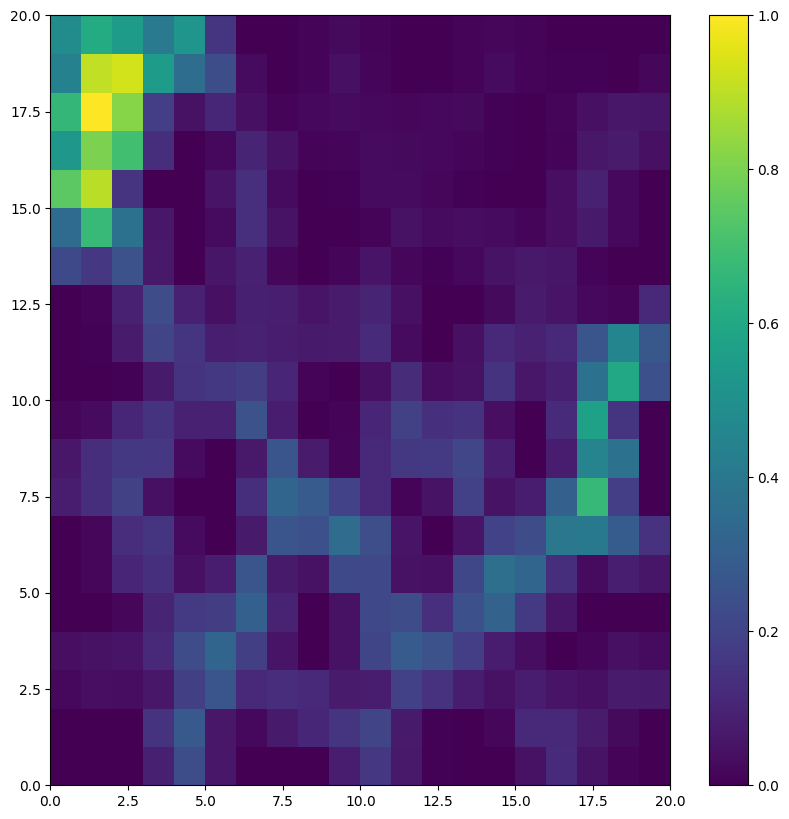

In [29]:
iterations = 50000

# train the model
som.train(df_scaled.values, iterations)

# plot the data
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='viridis')
plt.colorbar()
plt.show()

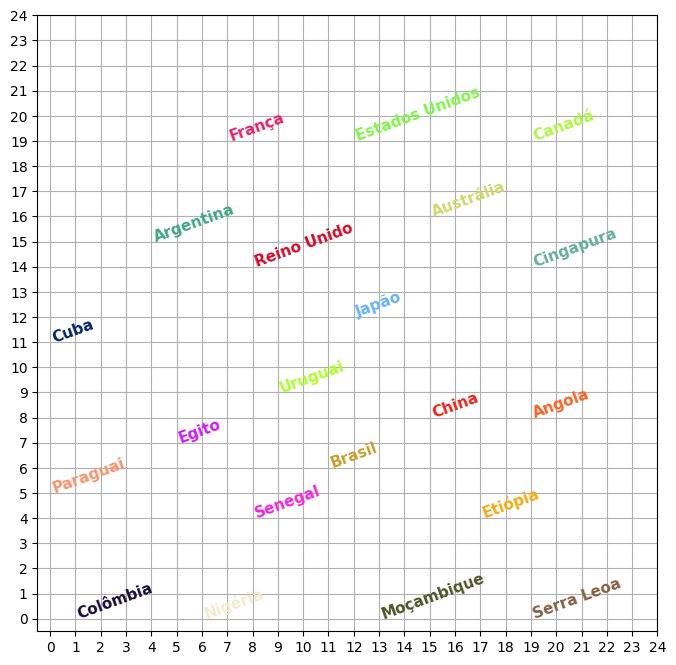

In [30]:
plt.figure(figsize=(8,8))
wmap = {}
im = 0

for x, t in zip(df_scaled.values, y):
  w = som.winner(x)
  wmap[w] = im
  plt.text(
      w[0], w[1], str(t),
      rotation=20,
      c=np.random.rand(3,),
      fontdict={'weight': 'bold', 'size': 11}
  )
  im = im+1

plt.axis([-0.5,9.5,-0.5,9.5])
plt.xticks(range(25))
plt.yticks(range(25))
plt.grid()

plt.show()

Com isso, é possível observar que os países com características em comum ficaram agrupados. Por exemplo, país mais desenvolvidos ficaram mais próximos, enquanto que países menos desenvolvidos tendeream a ficar mais agrupados.